<a href="https://colab.research.google.com/github/byein/Troller_KMeans/blob/main/Troller_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MLdataKMeans.csv to MLdataKMeans.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['MLdataKMeans.csv'].decode('utf-8')))

In [ ]:
df['tier'] = df['tier'].replace({'Iron':0})
df['tier'] = df['tier'].replace({'Bronze':1})
df['tier'] = df['tier'].replace({'Silver':2})
df['tier'] = df['tier'].replace({'Gold':3})
df['tier'] = df['tier'].replace({'Platinum':4})
df['tier'] = df['tier'].replace({'Diamond':5})
df['tier'] = df['tier'].replace({'Master':6})
df['tier'] = df['tier'].replace({'GrandMaster':7})
df['tier'] = df['tier'].replace({'Challenger':8})
df.head()

for v in df:
  if v[1] == 'Iron':
    v[1] = 0;
  elif v[1] == 'Bronze':
    v[1] = 1;
  elif v[1] == 'Silver':
    v[1] = 2;
  elif v[1] == 'Gold':
    v[1] = 3;
  elif v[1] == 'Platinum':
    v[1] = 4;
  elif v[1] == 'Diamond':
    v[1] = 5;
  elif v[1] == 'Master':
    v[1] = 6;
  elif v[1] == 'GrandMaster':
    v[1] = 7;
  elif v[1] == 'Challenger':
    v[1] = 8;
  display(v)
         

tiers = df[['tier','trollposibility']]
tiers
display(tiers.head())

'lolName'

'tier'

'trollposibility'

,tier,trollposibility
0,1,23.1
1,1,42.3
2,1,11.0
3,1,25.1
4,1,26.0


In [11]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import joblib # 모델 저장
# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = df.copy()

# # 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

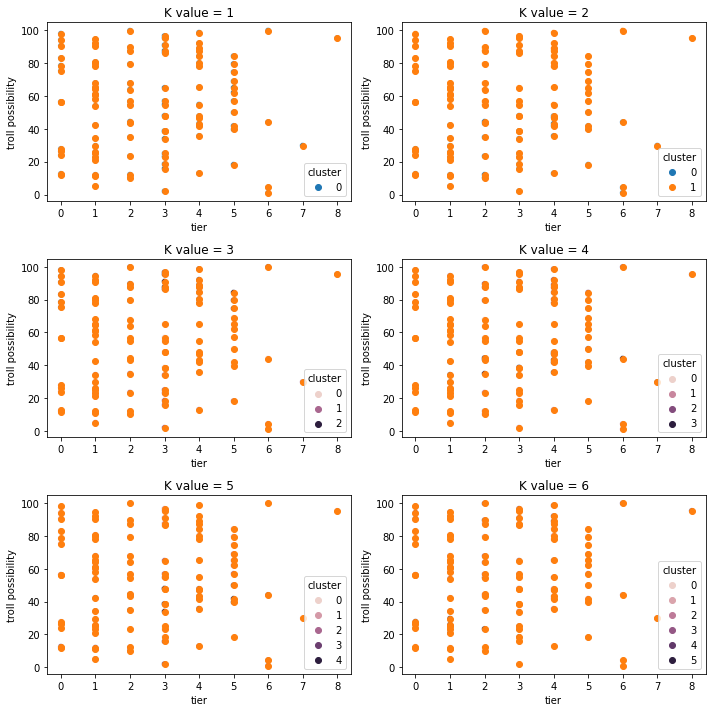

In [23]:
plt.figure(figsize=(10,10))

# iterate them to test K values 
for i in range(1,7):
    # create cluster
    model = KMeans(n_clusters = i)
    model.fit(tiers)
    df['cluster'] = model.fit_predict(tiers[['tier', 'trollposibility']])
    # ids = model.fit_predict(tiers[['tier', 'trollposibility']])

    # add a subplot with 2 rows and 3 columns (index = i)
    plt.subplot(3,2,i)
    sns.scatterplot(data=df, x='tier',y='trollposibility',hue='cluster')
    plt.tight_layout()
    
    # labeling the subplot
    plt.title("K value = {}".format(i))
    plt.xlabel('tier')
    plt.ylabel('troll possibility')
    plt.scatter(tiers['tier'],tiers['trollposibility'])
    # plot the scatters

    
    joblib.dump(model,'./kmeans_model'+str(i)+'.pkl')

    

# show the figure
plt.show()